In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns= {'v1':'output','v2':'input'},inplace=True)

In [ ]:
df.sample(5)

,output,input
1121,spam,Do you want 750 anytime any network mins 150 t...
3176,ham,In meeting da. I will call you
2481,ham,K.:)do it at evening da:)urgent:)
2596,ham,No i'm not gonna be able to. || too late notic...
1996,ham,Lol boo I was hoping for a laugh


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['output'] = label.fit_transform(df['output'])

In [ ]:
df.sample(4)

,output,input
398,0,"Good evening Sir, Al Salam Wahleykkum.sharing ..."
1818,0,Am i that much dirty fellow?
2463,0,"Good afternoon, babe. How goes that day ? Any ..."
4815,0,Anything is valuable in only 2 situations: Fir...


In [ ]:
df.isnull().sum()

output    0
input     0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
# removing the duplicate values..

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

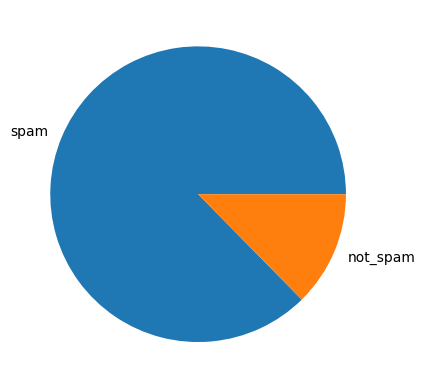

In [ ]:
import matplotlib.pyplot as plt

labels = 'spam', 'not_spam'


plt.pie(df['output'].value_counts(),labels=labels)
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['char_num'] = df['input'].apply(len)

In [ ]:
df.head(4)

,output,input,char_num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [ ]:
def num_words(data):
  return len(nltk.word_tokenize(data))

df['num_words'] = df['input'].apply(num_words)

In [ ]:
df.head(4)

,output,input,char_num,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [ ]:
def num_sentence(data):
  return len(nltk.sent_tokenize(data))

df['num_sentence'] = df['input'].apply(num_sentence)

In [ ]:
df.head(5)

,output,input,char_num,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.columns

Index(['output', 'input', 'char_num', 'num_words', 'num_sentence'], dtype='object')

In [ ]:
# let's check the stats of the spam and non spam sms separetly :

df[df['input']==0][['char_num', 'num_words', 'num_sentence']].describe() # for ham sms

,char_num,num_words,num_sentence
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [ ]:
df[df['input']==1][['char_num', 'num_words', 'num_sentence']].describe() # for spam sms

,char_num,num_words,num_sentence
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<Axes: >

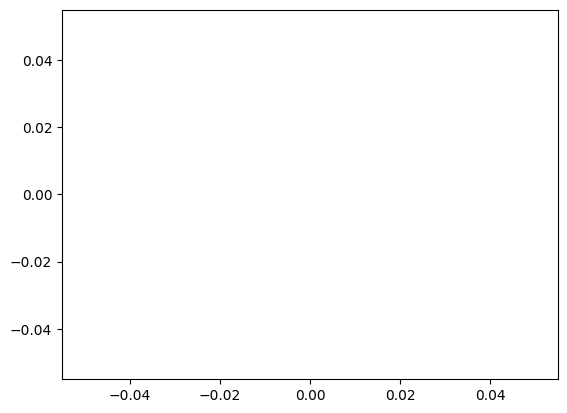

In [ ]:
# let's visualize more...
import seaborn as sns
sns.histplot(df[df['input']==0][['char_num']])

In [ ]:
# similarly we can plot more graphs to capture the info about the data

In [ ]:
# now let's jump into data preprocessing..


In [ ]:
# lowercasing
# tokenization
# removing special charecters
# removing stop words and punctuation
# stemming

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
import string

def pre_process(text):
  final = []

  tokenized = nltk.word_tokenize(text)
  no_special = re.sub('[^A-Za-z0-9.]+', ' ',text)



  no_special = no_special.split()
  stops = stopwords.words('english')
  for word in no_special:
     if word not in stops and word not in string.punctuation:
      final.append(word.lower())

  # for word in final :
  #   final.append(word.lower())



  return final




In [ ]:
df['input']=df['input'].apply(pre_process)

In [ ]:
df.head(5)

,output,input,char_num,num_words,num_sentence
0,0,"[go, jurong, point, crazy.., available, bugis,...",111,24,2
1,0,"[ok, lar..., joking, wif, u, oni...]",29,8,2
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,37,2
3,0,"[u, dun, say, early, hor..., u, c, already, sa...",49,13,1
4,0,"[nah, i, think, goes, usf, lives, around, though]",61,15,1


In [ ]:
# from nltk.corpus import stopwords
# def stops(text):
#   return stopwords.stops('english')


In [ ]:
# text = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


In [ ]:
# count=0
# for char in text:
#   count = count+1

# print(count)

In [ ]:

               # MORE TO WORK ON STEMMING ::::::

# # stemming
# from nltk.stem import PorterStemmer

# ps = PorterStemmer()

# for i in range(len(df['input'])):
#     words = df['input'][i]
#     stemmed_words = [ps.stem(word) for word in words]
#     df['input'][i] = stemmed_words


In [ ]:
df['input'][0]

['go',
 'jurong',
 'point',
 'crazy..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'got',
 'amore',
 'wat...']

In [ ]:
df.head(5)

,output,input,char_num,num_words,num_sentence
0,0,"[go, jurong, point, crazy.., available, bugis,...",111,24,2
1,0,"[ok, lar..., joking, wif, u, oni...]",29,8,2
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,37,2
3,0,"[u, dun, say, early, hor..., u, c, already, sa...",49,13,1
4,0,"[nah, i, think, goes, usf, lives, around, though]",61,15,1


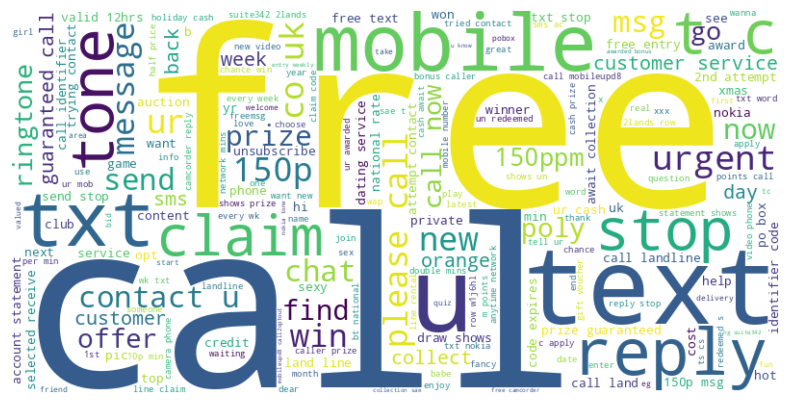

In [ ]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = df[df['output']==1]['input'].apply(lambda x: ' '.join(x))  # Converting  lists to strings


all_text = ' '.join(text_data)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()



In [ ]:
!pip install --upgrade gensim -q

In [ ]:
# import gensim
# from gensim.models import word2vec
# from gensim.models.word2vec import Word2Vec

# model = Word2Vec(sentences=df['input'], vector_size=100, window=5, sg=1, min_count=1)



In [ ]:
# model.build_vocab(df['input'], progress_per=10000)

In [ ]:
# model.train(df['input'], total_examples=len(df['input']), epochs=10)

In [ ]:
# X

In [ ]:
# model.wv.most_similar('free')

In [ ]:
# model.wv['go']

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# LET'S FIRST TRANSFORM OUR LIST INPUT INTO THE PRE_PROCESSED TEXT DATA:

In [ ]:
df['sms'] = df['input'].apply(lambda word_list: ' '.join(word_list))

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df['sms']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = df['output'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y.shape

(5169,)

In [ ]:
# now let's build our model architecture :

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9110251450676983
[[820  76]
 [ 16 122]]
0.6161616161616161


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[882  14]
 [  8 130]]
0.9027777777777778


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[894   2]
 [ 22 116]]
0.9830508474576272


In [ ]:
import pickle
pickle.dump(cv,open('vectorized.pkl','wb'))
pickle.dump(mnb,open('sms_classifier.pkl','wb'))